In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv("Zomato-data-.csv")
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet


In [ ]:
def handleRate(value):
  value=str(value).split('/')
  value=value[0]
  return float(value)

In [ ]:
df['rate']=df['rate'].apply(handleRate)
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


In [ ]:
df.isnull().sum()

,0
name,0
online_order,0
book_table,0
rate,0
votes,0
approx_cost(for two people),0
listed_in(type),0


In [ ]:
df.dtypes

,0
name,object
online_order,object
book_table,object
rate,float64
votes,int64
approx_cost(for two people),int64
listed_in(type),object


In [ ]:
df.name

,name
0,Jalsa
1,Spice Elephant
2,San Churro Cafe
3,Addhuri Udupi Bhojana
4,Grand Village
...,...
143,Melting Melodies
144,New Indraprasta
145,Anna Kuteera
146,Darbar


/tmp/ipython-input-3417476251.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df["listed_in(type)"],palette="rainbow")


Text(0.5, 1.0, 'Restaurants')

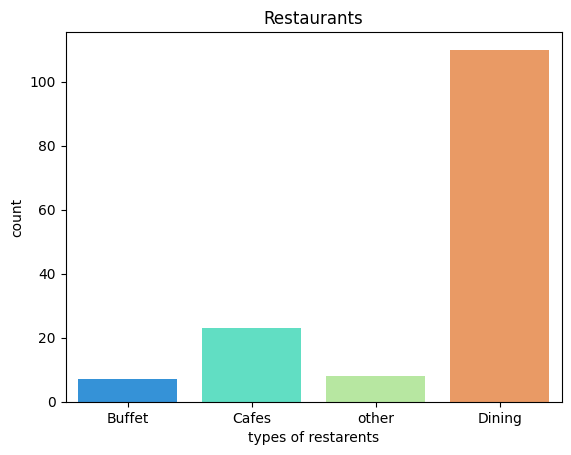

In [ ]:
sns.countplot(x=df["listed_in(type)"],palette="rainbow")
plt.xlabel("types of restarents")
plt.title("Restaurants")

Text(0.5, 1.0, 'votes')

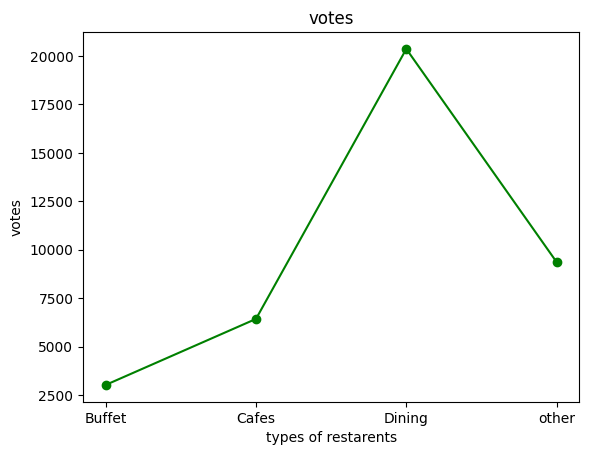

In [ ]:
grouped_data=df.groupby('listed_in(type)')['votes'].sum()
result=pd.DataFrame({'votes':grouped_data})
plt.plot(result, c="green", marker='o')
plt.xlabel('types of restarents')
plt.ylabel('votes')
plt.title('votes')

In [ ]:
max=df['votes'].max()
max

4884

/tmp/ipython-input-428946219.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['online_order'],palette="viridis")


Text(0.5, 0, 'online_order')

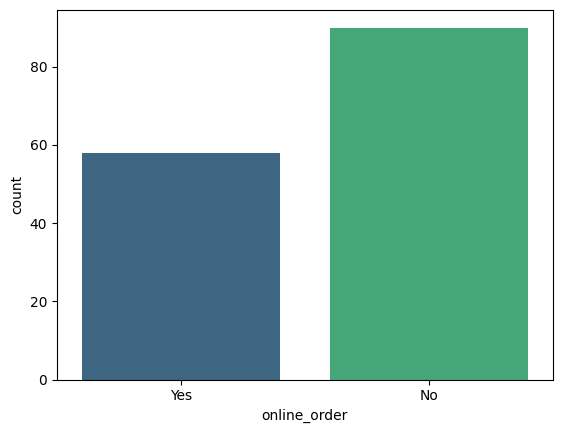

In [ ]:
sns.countplot(x=df['online_order'],palette="viridis")
plt.xlabel("online_order")

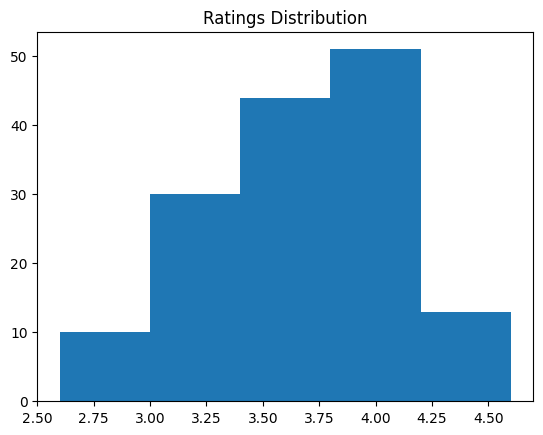

In [ ]:
plt.hist(df['rate'],bins=5)
plt.title('Ratings Distribution')
plt.show()

Text(0.5, 0, 'cost')

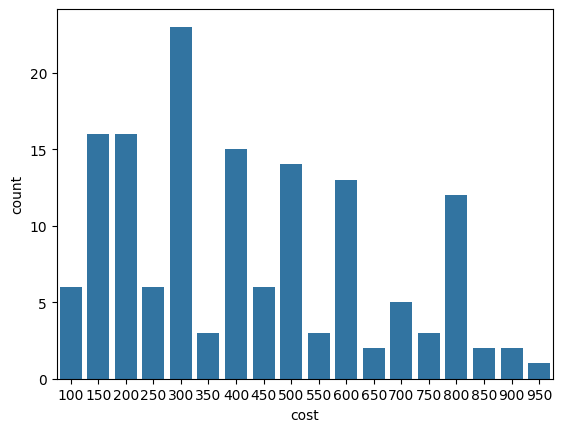

In [ ]:
couple_data=df['approx_cost(for two people)']
sns.countplot(x=couple_data)
plt.xlabel("cost")

<Axes: xlabel='online_order', ylabel='rate'>

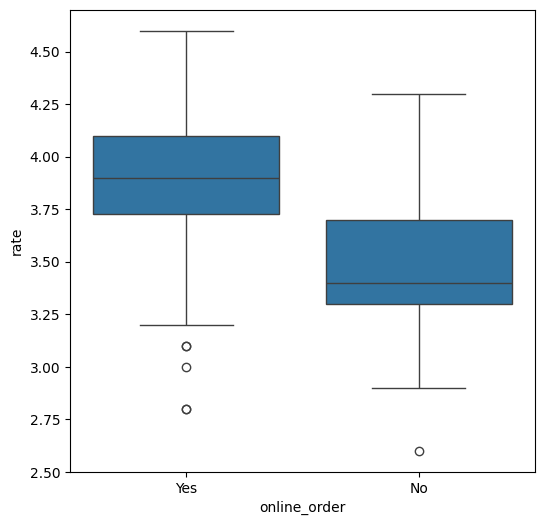

In [ ]:
plt.figure(figsize=(6,6))
sns.boxplot(x='online_order',y='rate',data=df)

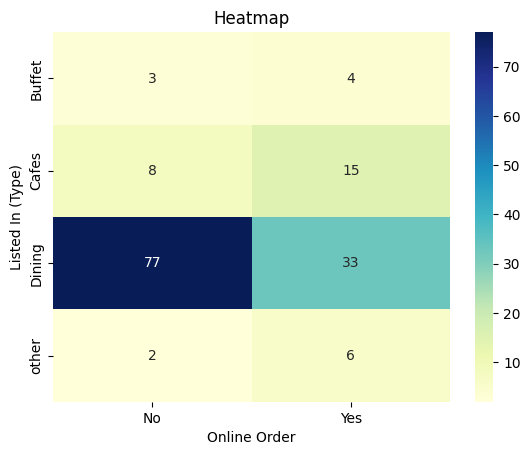

In [ ]:
pivot_table = df.pivot_table(index='listed_in(type)', columns='online_order', aggfunc='size',
fill_value=0)
sns.heatmap(pivot_table, annot=True, cmap='YlGnBu', fmt='d')
plt.title('Heatmap')
plt.xlabel('Online Order')
plt.ylabel('Listed In (Type)')
plt.show()